# 1. Linear Regression

In [1]:
# There are several ways to train a Linear Regression model.

## a. The Normal Equation

In [2]:
#Let's generate some linear looking data to test this equation
import numpy as np

X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

[0, 2, 0, 15]

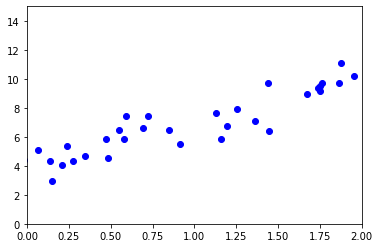

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, 'o', color = 'blue')
plt.axis([0, 2, 0, 15])

In [4]:
# Computing theta-kapa using the normal equation
X_b = np.c_[np.ones((100, 1)), X] #adding X_0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# The actual function used to geneate the data is: y = 4 + 3x + Gaussian noise
#Let's see what the equation found:
theta_best

array([[4.01672602],
       [2.97398746]])

In [6]:
# Now you can make predictions using theta-kapa
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.01672602],
       [9.96470093]])

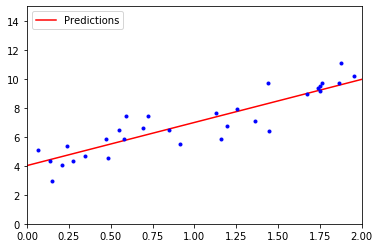

In [7]:
#Let's plot this model's predictions
plt.plot(X_new, y_predict, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend(loc = 'upper left')
plt.show()

## Performing Linear Regresion using the Normal Equation with Scikit-Learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.01672602]), array([[2.97398746]]))

In [9]:
lin_reg.predict(X_new)

array([[4.01672602],
       [9.96470093]])

In [10]:
#the LinearRegression class is based on the scipy.linalg.lstq() function, which you could call directly:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.01672602],
       [2.97398746]])

In [11]:
#this function-scipy.linalg.lstq()-computes theta-kapa = (X^+) * y where (X^+) is the pseudoinverse of X
#(specifically the Moore-Penrose inverse).
#you can use the np.linalg.pinv() to compute the pseudoinverse directly
np.linalg.pinv(X_b).dot(y)

array([[4.01672602],
       [2.97398746]])

## b. Gradient Descent.

### i). Batch Gradient Descent

In [12]:
# Let's look at a quick implementation of this algorithm
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta    

array([[4.01672602],
       [2.97398746]])

### ii). Stochastic Gradient Descent

In [13]:
# This code implements Stochastic Gradient Descent using a simple learning schedule.
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
#By convention we iterate by rounds of m iterations; each round is called an epoch. 
#While the Batch Gradient Descent code iterated 1,000 times through the whole training set,
#this code goes through the training set only 50 times and reaches a fairly good solution:
theta

array([[4.0112765 ],
       [2.97293842]])

### Performing Linear Regression using SGD with Scikit-Learn

In [15]:
#The following code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops
#by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1 (eta0=0.1),
#using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty=None)
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98207623]), array([3.05553215]))

### iii). Mini-batch Gradient Descent

# 2. Polynomial Regression

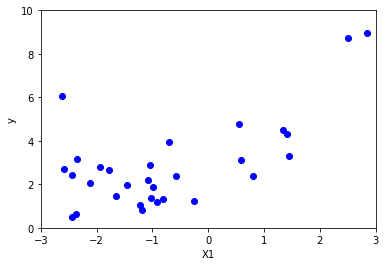

In [16]:
# Let's generate some nonlinear data, based on a simple quadratic equation(plus some noise).
#you can actually use a linear model to fit nonlinear data.
#A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended
#set of features.
#This technique is called Polynomial Regression
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'o', color = 'blue')
plt.axis([-3, 3, 0, 10])
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [17]:
# Clearly, a straight line will never fit this data properly.
#So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial)
#of each feature in the training set as new features (in this case there is just one feature):
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-11.31695316])

In [18]:
X_poly[0] #X_poly now contains the original feature of X plus the square of this feature.

array([-11.31695316, 128.07342885])

In [19]:
# Now you can fit a LinearRegression model to this extended training data.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.30499508]), array([[0.99268738, 0.49762441]]))

In [20]:
# Not bad:
# the model estimates y-kappa = 0.5X^2 + 1.019x(1) + 2.03 when infact the original function was:
# y = 0.5X^2 + 1.0x(1) + 2 + Gaussian noise

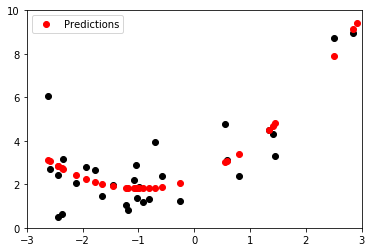

In [21]:
# Plotting the model's predictions:
y_pred = lin_reg.predict(X_poly)
plt.plot(X, y, 'o', color = 'black')
plt.axis([-3, 3, 0, 10])
plt.plot(X, y_pred, 'o', color = 'red', label = 'Predictions')
plt.legend(loc = 'upper left')
plt.show()

## Learning Curves

In [22]:
#these are plots of the model’s performance on the training set and the validation set as a function of the training set size
#(or the training iteration).
#The following code defines a function that plots the learning curves of a model given some training data:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')

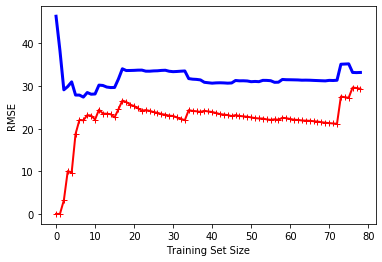

In [23]:
# Let's look at the learning curves of the plain Linear Regression model(a straight line):
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [24]:
#This deserves a bit of explanation.
#First, let’s look at the performance on the training data:
#when there are just one or two instances in the training set, the model can fit them perfectly,
#which is why the curve starts at zero.
#But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly,
#both because the data is noisy and because it is not linear at all.
#So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set
#doesn’t make the average error much better or worse.
#Now let’s look at the performance of the model on the validation data
#When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the
#validation error is initially quite big.
#Then as the model is shown more training examples, it learns and thus the validation error slowly goes down.
#However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau,
#very close to the other curve.
#These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.

[0, 80, 0, 3]

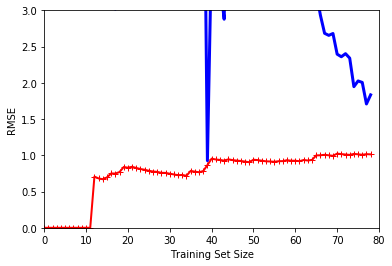

In [25]:
# Now let's look at the learing cuves of a 10th degree polynomial model on the same data:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

In [26]:
#These learning curves look a bit like the previous ones, but there are two very important differences:
#• The error on the training data is much lower than with the Linear Regression model.
#• There is a gap between the curves.
#This means that the model performs significantly better on the training data than on the validation data, which is the hallmark
#of an overfitting model.
#However, if you used a much larger training set, the two curves would continue to get closer.

# 3. Regularized Linear Models

## a). Ridge Regression

### i). Performing Ridge Regression with Scikit-Learn using a closed form solution

In [27]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[13.53894187]])

### ii). Performing Ridge Regression with Scikit-Learn using Stochastic Gradient Descent

In [28]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([12.06919677])

In [29]:
#The penalty hyperparameter sets the type of regularization term to use.
#Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of
#the ℓ2 norm of the weight vector: this is simply Ridge Regression.

## b). Lasso Regression

### i). Performing Lasso Regression with Scikit-Learn using a closed form solution

In [30]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([13.54933661])

### ii). Performing Lasso Regression with Scikit-Learn using Stochastic Gradient Descent.

In [31]:
sgd_reg = SGDRegressor(penalty = 'l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.71298462])

## c). Elastic Net

In [32]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([13.55688994])

## Early Stopping

In [33]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [34]:
#Note that with warm_start=True, when the fit() method is called, it just continues training where it left off instead of
#restarting from scratch.

# 4. Logistic Regression

In [35]:
# Let's use the iris dataset to illustrate Logistic Regression.
# This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species:
#Iris-Setosa, Iris-Versicolor, and Iris-Virginica.
#Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature:

#loading the data
from sklearn import datasets
iris = datasets.load_iris()
list(iris)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [36]:
X = iris['data'][:, 3:] #petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica else 0

In [37]:
# Training a Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

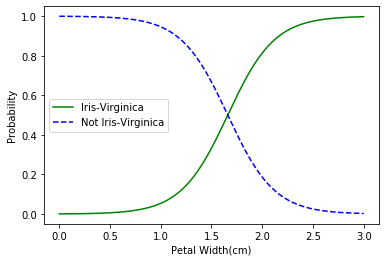

In [38]:
# Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm.
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris-Virginica')
plt.xlabel('Petal Width(cm)')
plt.ylabel('Probability')
plt.legend(loc = 'center left')

In [39]:
# The petal width of Iris-Virginica flowers ranges from 1.4cm to 2.5 cm, while the other iris flowers generally have a smaller
#petal width, ranging from 0.1 cm to 1.8 cm.
# Notice that there is a bit of overlap.
# Above about 2 cm the classifier is highly confident that the flower is an IrisVirginica
#(it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica
#(high probability for the “Not Iris-Virginica” class).
# In between these extremes, the classifier is unsure.
# However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method),
#it will return whichever class is the most likely.
# Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%:
#if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an IrisVirginica,
#or else it will predict that it is not (even if it is not very confident)

log_reg.predict([[1.7], [1.5]])

array([1, 0])

# 5. Softmax Regression

In [40]:
# ScikitLearn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes,
#but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead.
# You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver.
#It also applies ℓ2 regularization by default, which you can control using the hyperparameter C.

In [41]:
# Using Softmax Regression to classify the iris flowers into all 3 classes.
X = iris['data'][:, (2, 3)] #petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# predicting an iris with 5cm long and 2cm wide petals:
softmax_reg.predict([[5, 2]]) # Iris-Virginica(class 2)

array([2])

In [43]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])